In [1]:
# %reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
!pip install spotipy

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

import json
import base64
import requests

import numpy as np
import pandas as pd

In [2]:
client_id ='f3fac8dc166d4eda8684e41136883787'
client_secret ='ea2093ecc8d74480b2b8c9cd851024f1'

client_credentials_manager = spotipy.SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [3]:
my_uri = 'spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX'
#BTS's uri

results = spotify.artist_albums(my_uri)
albums = results['items']

while results['next']:
    results = spotify.next(results)
    albums.extend(results['items'])

album_name = []
album_uri = []
for a in albums:
    album_name.append(a['name'])
    album_uri.append(a['uri'])
#     print(album['name'], album['uri'])

In [6]:
print(albums[0])


{'album_group': 'album', 'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3Nrfpe0tUJi4K4DXYWgMUX'}, 'href': 'https://api.spotify.com/v1/artists/3Nrfpe0tUJi4K4DXYWgMUX', 'id': '3Nrfpe0tUJi4K4DXYWgMUX', 'name': 'BTS', 'type': 'artist', 'uri': 'spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX'}], 'available_markets': ['AD', 'AE', 'AL', 'AR', 'AT', 'AU', 'BA', 'BE', 'BG', 'BH', 'BO', 'BR', 'BY', 'CA', 'CH', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HK', 'HN', 'HR', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JO', 'JP', 'KW', 'KZ', 'LB', 'LI', 'LT', 'LU', 'LV', 'MA', 'MC', 'MD', 'ME', 'MK', 'MT', 'MX', 'MY', 'NI', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH', 'PL', 'PS', 'PT', 'PY', 'QA', 'RO', 'RS', 'RU', 'SA', 'SE', 'SG', 'SI', 'SK', 'SV', 'TH', 'TN', 'TR', 'TW', 'UA', 'US', 'UY', 'VN', 'XK', 'ZA'], 'external_urls': {'spotify': 'https://open.spotify.com/album/1nScVw87kRJiT2bg2Kswhp'}, 'href

In [14]:
track_name = []
track_uri = []
track_popularity = []
track_album = []

for i in range(0,len(album_uri)):
    results = spotify.album_tracks(album_uri[i])['items']
    for t in range(0, len(results)):
        track_name.append(results[t]['name'])
        track_uri.append(results[t]['uri'])
        track_popularity.append(spotify.track(results[t]['uri'])['popularity'])
        track_album.append(album_name[i])
        

['INTRO : Calling', 'Stay Gold', 'Boy With Luv - Japanese ver.', 'Make It Right - Japanese ver.', 'Dionysus - Japanese ver.', 'IDOL - Japanese ver.', 'Airplane pt.2 - Japanese ver.', 'FAKE LOVE - Japanese ver.', 'Black Swan - Japanese ver.', 'ON - Japanese ver.', 'Lights', 'Your eyes tell', 'OUTRO : The Journey', 'Intro : Persona', 'Boy With Luv (Feat. Halsey)', 'Make It Right', 'Jamais Vu', 'Dionysus', 'Interlude : Shadow', 'Black Swan', 'Filter', 'My Time', 'Louder than bombs', 'ON', 'UGH!', '00:00 (Zero O’Clock)', 'Inner Child', 'Friends', 'Moon', 'Respect', 'We are Bulletproof : the Eternal', 'Outro : Ego', 'ON (Feat. Sia)', 'Intro : Persona', 'Boy With Luv (Feat. Halsey)', 'Make It Right', 'Jamais Vu', 'Dionysus', 'Interlude : Shadow', 'Black Swan', 'Filter', 'My Time', 'Louder than bombs', 'ON', 'UGH!', '00:00 (Zero O’Clock)', 'Inner Child', 'Friends', 'Moon', 'Respect', 'We are Bulletproof : the Eternal', 'Outro : Ego', 'ON (Feat. Sia)', 'Intro : Persona', 'Boy With Luv (feat. H

In [10]:
track_audio_features = []

for i in range(0, len(track_uri)):
    results = spotify.audio_features(track_uri[i])
    track_audio_features.append(results)

In [15]:
df_list = []

for i in range(0, len(track_audio_features)):
    df_mini = pd.DataFrame.from_dict(track_audio_features[i])
    df_list.append(df_mini)

df = pd.concat(df_list)
df['name'] = track_name
df['popularity'] = track_popularity
df['album'] = track_album


In [16]:
df2 = df[['name', 'album', 'popularity', 
          'key', 'tempo', 'time_signature', 'mode', 'duration_ms',
         'acousticness', 'danceability', 'energy', 'instrumentalness', 
         'liveness', 'loudness', 'speechiness', 'valence',
         'id', 'uri', 'analysis_url', 'track_href']]
df2

,name,album,popularity,key,tempo,time_signature,mode,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,id,uri,analysis_url,track_href
0,INTRO : Calling,MAP OF THE SOUL : 7 ~ THE JOURNEY ~,58,10,144.992,4,1,84613,0.582000,0.486,0.610,0.791000,0.1440,-12.063,0.0348,0.0806,5raJ9QoZOdoRZ1MZOcygkR,spotify:track:5raJ9QoZOdoRZ1MZOcygkR,https://api.spotify.com/v1/audio-analysis/5raJ...,https://api.spotify.com/v1/tracks/5raJ9QoZOdoR...
0,Stay Gold,MAP OF THE SOUL : 7 ~ THE JOURNEY ~,80,1,129.017,4,1,243267,0.089200,0.723,0.634,0.000000,0.0787,-5.415,0.0542,0.5820,3Ys2PYl1wyPKQIwyqhP9cQ,spotify:track:3Ys2PYl1wyPKQIwyqhP9cQ,https://api.spotify.com/v1/audio-analysis/3Ys2...,https://api.spotify.com/v1/tracks/3Ys2PYl1wyPK...
0,Boy With Luv - Japanese ver.,MAP OF THE SOUL : 7 ~ THE JOURNEY ~,59,11,119.917,4,0,230013,0.066100,0.673,0.855,0.000000,0.2090,-4.650,0.0890,0.7800,1GAAUZBTaIM1LwNpOJQJrZ,spotify:track:1GAAUZBTaIM1LwNpOJQJrZ,https://api.spotify.com/v1/audio-analysis/1GAA...,https://api.spotify.com/v1/tracks/1GAAUZBTaIM1...
0,Make It Right - Japanese ver.,MAP OF THE SOUL : 7 ~ THE JOURNEY ~,56,7,104.067,4,1,225520,0.016300,0.571,0.703,0.000000,0.2620,-7.401,0.4680,0.2380,6P0Ni8GrnwRScC4uk8tKqM,spotify:track:6P0Ni8GrnwRScC4uk8tKqM,https://api.spotify.com/v1/audio-analysis/6P0N...,https://api.spotify.com/v1/tracks/6P0Ni8GrnwRS...
0,Dionysus - Japanese ver.,MAP OF THE SOUL : 7 ~ THE JOURNEY ~,55,7,175.992,4,1,248907,0.021800,0.455,0.893,0.000000,0.3580,-3.712,0.1480,0.5880,6j0NiWoRQDiNC05RwVVZNa,spotify:track:6j0NiWoRQDiNC05RwVVZNa,https://api.spotify.com/v1/audio-analysis/6j0N...,https://api.spotify.com/v1/tracks/6j0NiWoRQDiN...
0,IDOL - Japanese ver.,MAP OF THE SOUL : 7 ~ THE JOURNEY ~,55,6,126.014,4,0,223213,0.000331,0.705,0.754,0.000000,0.1290,-5.453,0.0895,0.4220,2vYF5MHeCNtqCVastthDAo,spotify:track:2vYF5MHeCNtqCVastthDAo,https://api.spotify.com/v1/audio-analysis/2vYF...,https://api.spotify.com/v1/tracks/2vYF5MHeCNtq...
0,Airplane pt.2 - Japanese ver.,MAP OF THE SOUL : 7 ~ THE JOURNEY ~,55,0,139.994,4,0,220053,0.040000,0.752,0.782,0.000001,0.0841,-5.173,0.0297,0.9010,4EeVAiJtyblHzvkN9sZCmM,spotify:track:4EeVAiJtyblHzvkN9sZCmM,https://api.spotify.com/v1/audio-analysis/4EeV...,https://api.spotify.com/v1/tracks/4EeVAiJtyblH...
0,FAKE LOVE - Japanese ver.,MAP OF THE SOUL : 7 ~ THE JOURNEY ~,55,2,154.923,4,0,243533,0.003620,0.546,0.682,0.000000,0.2950,-5.628,0.0390,0.4330,4jTEbIwCMcHSwlSEiR4NlQ,spotify:track:4jTEbIwCMcHSwlSEiR4NlQ,https://api.spotify.com/v1/audio-analysis/4jTE...,https://api.spotify.com/v1/tracks/4jTEbIwCMcHS...
0,Black Swan - Japanese ver.,MAP OF THE SOUL : 7 ~ THE JOURNEY ~,55,2,147.037,4,0,198760,0.166000,0.714,0.736,0.000000,0.1330,-5.724,0.0819,0.5360,5smmjzMNkj4YSacTBH6taZ,spotify:track:5smmjzMNkj4YSacTBH6taZ,https://api.spotify.com/v1/audio-analysis/5smm...,https://api.spotify.com/v1/tracks/5smmjzMNkj4Y...
0,ON - Japanese ver.,MAP OF THE SOUL : 7 ~ THE JOURNEY ~,55,9,105.991,4,0,247987,0.119000,0.598,0.821,0.000000,0.2980,-5.653,0.1140,0.4280,2hhizKAVm9wNn0d2N05jkG,spotify:track:2hhizKAVm9wNn0d2N05jkG,https://api.spotify.com/v1/audio-analysis/2hhi...,https://api.spotify.com/v1/tracks/2hhizKAVm9wN...


In [29]:
import re

df3 = df2
df3['feat'] = df3['name'].apply(lambda x: 1 if (re.search("feat", x)) else 0)
df3.to_csv("2020.11.12 BTS All Songs.csv")
df3['feat'].sum()

55

In [30]:
import statsmodels.api as sm

X = df3[['acousticness','danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 
        'speechiness', 'tempo', 'valence',
       'feat']] # here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
Y = df3['popularity']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     10.65
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           1.77e-18
Time:                        15:20:20   Log-Likelihood:                -3710.0
No. Observations:                 827   AIC:                             7444.
Df Residuals:                     815   BIC:                             7501.
Df Model:                          11                                         
Covariance Type:                  HC3                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               79.8139      9.713  

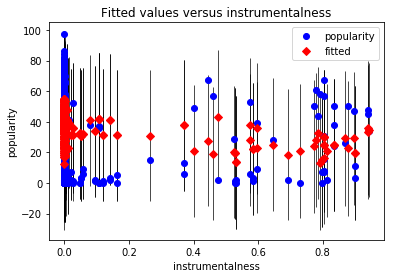

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(model, 5, ax=ax)

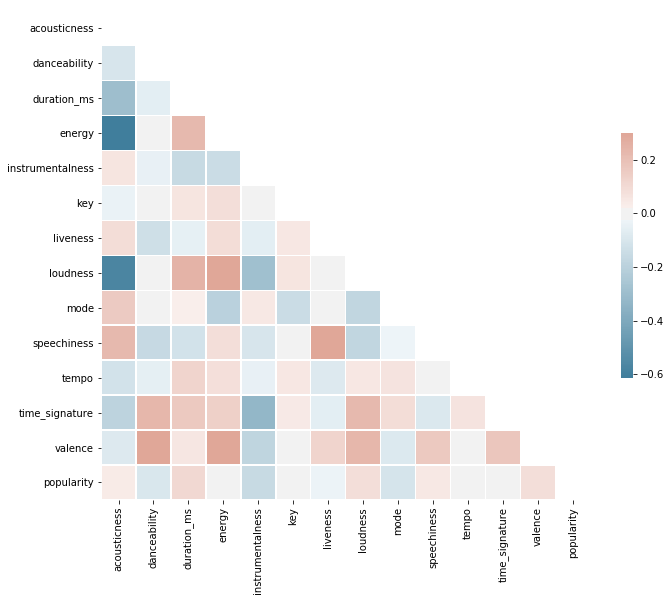

In [34]:
import seaborn as sns
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

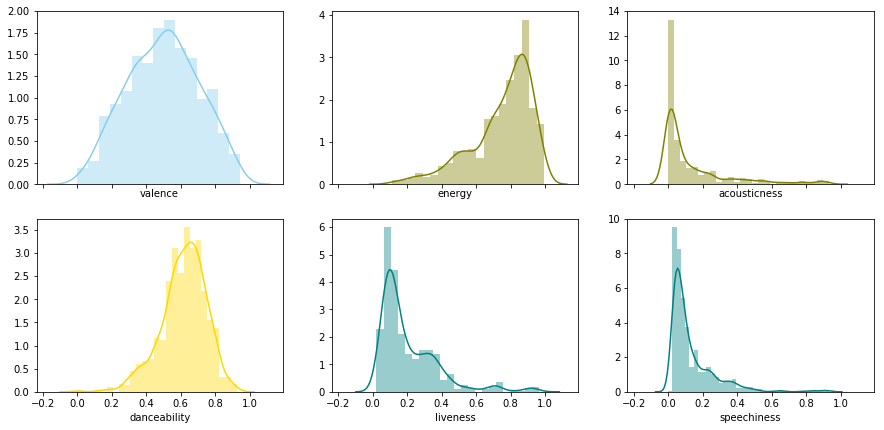

In [46]:
# df3['valence'].hist()
f, axes = plt.subplots(2, 3, figsize=(15, 7), sharex=True)
sns.distplot( df3["valence"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df3["energy"] , color="olive", ax=axes[0, 1])
sns.distplot( df3["acousticness"] , color="olive", ax=axes[0, 2])
sns.distplot( df3["danceability"] , color="gold", ax=axes[1, 0])
sns.distplot( df3["liveness"] , color="teal", ax=axes[1, 1])
sns.distplot( df3["speechiness"] , color="teal", ax=axes[1, 2])


